In [1]:
import seaborn as sns 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
292,15625395,Male,55,39000,1
268,15746203,Female,47,144000,1
229,15721007,Female,42,80000,1
193,15662901,Male,19,70000,0
329,15639576,Female,47,107000,1
319,15623502,Male,36,60000,0
355,15606472,Male,60,34000,1
246,15638003,Female,35,50000,0
279,15759684,Female,50,36000,1
32,15573452,Female,21,16000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [23]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
143/400

0.3575

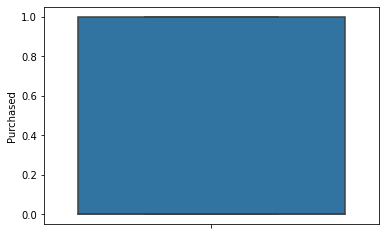

In [10]:
sns.boxplot(y='Purchased',data=df);

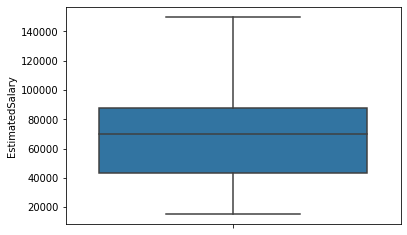

In [11]:
sns.boxplot(y='EstimatedSalary',data=df);

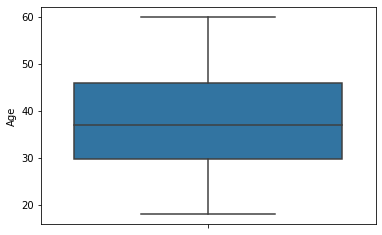

In [12]:
sns.boxplot(y='Age',data=df);

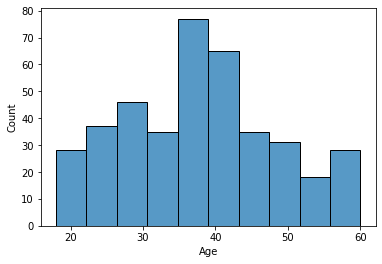

In [13]:
sns.histplot(x='Age',data=df)

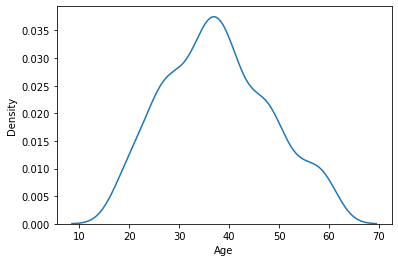

In [15]:
sns.kdeplot(x='Age',data=df);

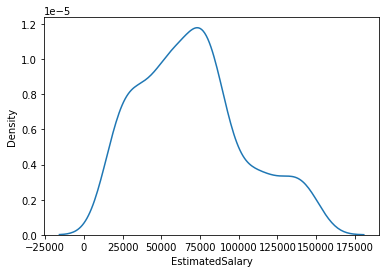

In [16]:
sns.kdeplot(x='EstimatedSalary',data=df);

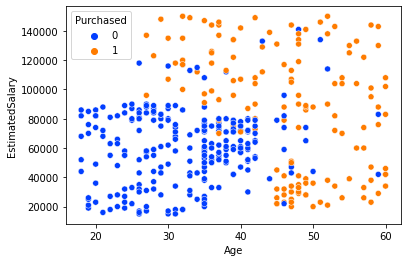

In [20]:
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=df,palette='bright');

#Feature Selection

In [21]:
X=df[['EstimatedSalary','Age']]

In [22]:
X

,EstimatedSalary,Age
0,19000,19
1,20000,35
2,43000,26
3,57000,27
4,76000,19
...,...,...
395,41000,46
396,23000,51
397,20000,50
398,33000,36


In [24]:
y=df['Purchased']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_test_split?

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [28]:
X_train

,EstimatedSalary,Age
157,75000,29
109,80000,38
17,26000,45
347,108000,54
24,23000,46
...,...,...
71,27000,24
106,35000,26
270,133000,43
348,77000,39


In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
Sc=StandardScaler()

In [31]:
X_train_scaled=Sc.fit_transform(X_train)

In [32]:
X_test_scaled=Sc.transform(X_test)

In [33]:
X_train_scaled

array([[ 0.1301563 , -0.84252154],
       [ 0.2777019 ,  0.04175763],
       [-1.31579061,  0.72953032],
       [ 1.10395728,  1.61380949],
       [-1.40431797,  0.82778356],
       [-1.25677236, -1.43204099],
       [ 0.1301563 , -0.05649561],
       [-0.16493491,  0.43477059],
       [ 0.01211982, -0.2530021 ],
       [ 2.22530386,  1.31904976],
       [ 0.74984783,  0.14001087],
       [ 0.54328399, -1.33378775],
       [ 0.72033871,  2.00682245],
       [-1.43382709, -1.23553451],
       [-0.34198963,  0.33651735],
       [ 0.54328399, -0.94077478],
       [ 0.2777019 ,  0.43477059],
       [ 1.10395728,  0.43477059],
       [ 0.74984783,  0.82778356],
       [ 1.25150288,  0.9260368 ],
       [-1.25677236, -0.44950858],
       [-1.34529973, -1.82505395],
       [ 0.54328399,  1.12254328],
       [-1.64039093, -0.64601506],
       [ 0.24819278, -0.7442683 ],
       [ 2.07775825,  1.02429004],
       [ 1.36953936, -0.54776182],
       [ 0.01211982, -0.05649561],
       [ 0.45475663,

In [34]:
X_test_scaled

array([[-1.43382709,  0.82778356],
       [ 0.51377487,  2.10507569],
       [-0.78462644, -0.94077478],
       [ 0.74984783,  1.02429004],
       [-1.25677236, -0.84252154],
       [-0.25346227, -0.7442683 ],
       [ 1.07444816,  0.9260368 ],
       [ 0.36622926, -0.84252154],
       [ 0.1301563 ,  0.23826411],
       [-0.16493491,  0.43477059],
       [-0.16493491, -0.2530021 ],
       [-1.07971764,  1.51555624],
       [-0.66658995, -1.43204099],
       [-1.40431797, -1.72680071],
       [ 0.48426575, -0.7442683 ],
       [ 1.10395728, -0.2530021 ],
       [-0.96168116,  1.417303  ],
       [ 0.10064718,  0.82778356],
       [-0.84364468,  0.14001087],
       [-0.31248051,  1.81031597],
       [-1.28628149, -1.53029423],
       [ 0.2777019 , -0.84252154],
       [-1.40431797,  0.9260368 ],
       [ 0.15966542,  2.10507569],
       [-1.52235445, -1.82505395],
       [-1.40431797,  1.31904976],
       [ 0.2777019 ,  0.43477059],
       [-0.51904435, -0.05649561],
       [ 1.60561233,

#Model Building

In [35]:
from sklearn.svm import SVC

In [39]:
classifier=SVC(C=1,kernel='linear')

In [36]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Lm=LogisticRegression()

In [40]:
classifier.fit(X_train_scaled,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [41]:
y_pred=classifier.predict(X_test_scaled)

In [42]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [43]:
classifier.score(X_train_scaled,y_train)

0.8214285714285714

In [44]:
classifier.score(X_test_scaled,y_test)

0.85

In [45]:
from sklearn.metrics import confusion_matrix,classification_report

In [46]:
cm=confusion_matrix(y_test,y_pred)

In [47]:
cm

array([[72,  1],
       [17, 30]])

In [48]:
0.3*400

120.0

In [49]:
102/120

0.85

In [51]:
y_test[:20]

209    0
280    1
33     0
210    1
93     0
84     0
329    1
94     0
266    0
126    0
9      0
361    1
56     0
72     0
132    0
42     0
278    1
376    0
231    0
385    1
Name: Purchased, dtype: int64

In [52]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89        89
           1       0.64      0.97      0.77        31

    accuracy                           0.85       120
   macro avg       0.81      0.89      0.83       120
weighted avg       0.90      0.85      0.86       120



In [53]:
30/(30+17)

0.6382978723404256